# Eigenvalue problem of a vibrating square membrane, part 2

In [1]:
addpath([pwd, '/../../..']);
replab_init('verbose', 0);
g1 = [9 6 3 8 5 2 7 4 1];
g2 = [3 2 1 6 5 4 9 8 7];
DH = replab.PermutationGroup.of(g1, g2)
natRep = DH.naturalRep;
natDec = natRep.decomposition.nice;
basis = natDec.basis;
image1 = natRep.image(g1);
image2 = natRep.image(g2);
M=[4 -1 0 -1 0 0 0 0 0; -1 4 -1 0 -1 0 0 0 0; 0 -1 4 0 0 -1 0 0 0;
    -1 0 0 4 -1 0 -1 0 0; 0 -1 0 -1 4 -1 0 -1 0; 0 0 -1 0 -1 4 0 0 -1;
    0 0 0 -1 0 0 4 -1 0;0 0 0 0 -1 0 -1 4 -1 ; 0 0 0 0 0 -1 0 -1 4] ;

DH =


Permutation group acting on 9 elements of order 8
            identity: [1, 2, 3, 4, 5, 6, 7, 8, 9]
generator(1 or 'x1'): [9, 6, 3, 8, 5, 2, 7, 4, 1]
generator(2 or 'x2'): [3, 2, 1, 6, 5, 4, 9, 8, 7]
    recognize.source: Dihedral group of order 8



### The Block Diagonalization of the matrix $M$

Before we go on and apply symmetrization to the matrix $M$, we have to be sure that our matrix has the symmetry of the representation $\vartheta_{nat}$. In other words, the relation
\begin{align*}
MD(s) = D(s)M
\end{align*}
should be satisfied for every element $s$ in the dihedral group $D_4$, where $D(s)$ are the representing matrices in the natural representation. Since every other element of $D_4$ can be written as a composite of the generators, we only have to check if the above condition is met for the images of the generators $g_1$ and $g_2$.

In [2]:
assert(isequal(M*image1,image1*M))
assert(isequal(M*image2,image2*M))

Thus, because the matrix $M$ commutes with the images of the generators in $\vartheta_{nat}$, the first condition for the block diagonalization is met.

Since we now have the knowledge of that, we can always pass to the coordinate system of that basis and find the form of the matrix $M$ with respect to the aforementioned column vectors. We further assume that the column vectors are a **symmetry adapted basis**, in a sense that the basis vectors of each isotypic component are transformed in exactly the same way under the representation. Taking into account the above table of the isotypic components and based on the existence of invariant subspaces of the representation, we deduce that the new $M$ matrix will contain $n_j$ square blocks of length $c_j$.

To see how this can be accomplished, we apply a similarity transformation to the matrix $M$ in the following manner:

In [3]:
M_block = inv(basis)*M*basis

M_block =

 Columns 1 through 8:

   4.0000  -1.0000        0        0        0        0        0  -0.0000
  -4.0000   4.0000  -2.0000        0  -0.0000  -0.0000  -0.0000   0.0000
        0  -2.0000   4.0000   0.0000   0.0000   0.0000  -0.0000   0.0000
        0        0        0   4.0000        0  -0.0000   0.0000   0.0000
        0        0        0        0   4.0000   0.0000   0.0000  -0.0000
        0        0        0        0        0   4.0000  -0.0000  -1.4142
        0        0        0        0        0   0.0000   4.0000  -0.0000
        0        0        0        0        0  -1.4142   0.0000   4.0000
        0        0        0        0        0   0.0000  -1.4142  -0.0000

 Column 9:

        0
   0.0000
  -0.0000
   0.0000
  -0.0000
  -0.0000
  -1.4142
   0.0000
   4.0000



Notice that in the new basis the matrix M acquires indeed a block-diagonal form, a fact that encodes the importance of the process of symmetrization for the eigenvalue problem. However, the careful reader may have noticed that for the last isotypic component we have one $4 \times 4$ block instead of the two $2 \times 2$ blocks that we expected. This contradiction stems from the fact that the column vectors for the 4th isotypic component are not a symmetry adapted basis in the way that we labelled our basis vectors.

To further elucidate this point, note that, by Schur's Lemma, the blocks in the last isotypic component:

In [4]:
M_block(6:7, 6:7);
M_block(6:7, 8:9);
M_block(8:9, 6:7);
M_block(8:9, 8:9);

will be scalar multiples of the identity matrix $\mathbb{I}_2$. Hence, the $4 \times 4$ block ``M_block(6:9,6:9)`` has the form $A \otimes \mathbb{I}_2$, where $A$ is a $2 \times 2$ matrix that contains the non-zero values that appear in the block:

In [5]:
M_block(6:9,6:9)

ans =

   4.0000e+00  -1.1797e-16  -1.4142e+00  -1.9256e-16
   2.0702e-18   4.0000e+00  -3.8907e-16  -1.4142e+00
  -1.4142e+00   2.0540e-16   4.0000e+00   2.6501e-16
   3.6013e-16  -1.4142e+00  -3.7724e-17   4.0000e+00



Therefore, by permuting the rows and columns ``[6 7 8 9]`` $\to$ ``[6 8 7 9]``, this block in the 4th isotypic component acquires the form $\mathbb{I}_2 \otimes A$, which is obviously block diagonal by the properties of the Kronecker product:

In [6]:
M_block_Iso4 = M_block([6 8 7 9],[6 8 7 9])

M_block_Iso4 =

   4.0000e+00  -1.4142e+00  -1.1797e-16  -1.9256e-16
  -1.4142e+00   4.0000e+00   2.0540e-16   2.6501e-16
   2.0702e-18  -3.8907e-16   4.0000e+00  -1.4142e+00
   3.6013e-16  -3.7724e-17  -1.4142e+00   4.0000e+00



The take-away message is that this interchanging of rows and columns corresponds to a __rearrangement__ of the sequence of the __same basis vectors__ in this particular isotypic component, in order to make the invariance of the two 2-dimensional subspaces evident. Hence, what we are left with after the interchange is a block diagonal matrix, which contains a block-matrix for each of the isotypic components.

As a result, having explicitly made use of the symmetries of our problem, we have reduced the eigenvalue problem of M to the $c_j$-dimensional eigenvalue problems:

\begin{align*}
|M_j - \lambda \mathbb{I}_{c_j}| = 0 \quad j=1,2,\dots, N
\end{align*}

where $M_j$ are the blocks of length $c_j$ that constitute the matrix $M$ and indicate the invariant nature of the subspaces.

In other words, instead of solving the full eigenvalue problem for the sparse matrix $M$, we only have to take into account the $N$ blocks and solve a $c_j$-dimensional eigenvalue in each block. In this case, it can be checked that the characteristic polynomial of $M$ factors into a cubic and a quadratic equation.

### Finding the eigenvalues and the eigenspaces

We are now ready to solve the eigenvalue problem for the block-diagonal matrix $M$ and compute the eigenspaces that correspond to the eigenvalues $\lambda$. To that end, we will treat each block that corresponds to an isotypic component seperately, as we have already established in the previous section.

The block that is associated with the first isotypic component $V_1$ can be obtained by:

In [7]:
Block1 = M_block(1:3,1:3)

Block1 =

   4.0000  -1.0000        0
  -4.0000   4.0000  -2.0000
        0  -2.0000   4.0000



We can now apply the *MATLAB/Octave* **eig** function directly to this particular block and obtain then eigenvalues and eigenvectors for the first component:

In [8]:
[U1,E1] = eig(Block1)

U1 =

   0.2774   0.4472   0.2774
  -0.7845        0   0.7845
   0.5547  -0.8944   0.5547

E1 =

Diagonal Matrix

   6.8284        0        0
        0   4.0000        0
        0        0   1.1716



For the next isotypic components $V_2$ and $V_3$ the eigenvalue problem are rather trivial; in each component the eigenvalue is equal to 4, since the blocks are just scalars in these cases, whereas the eigenvector is the corresponding column vector in our basis, as we can easily verify:

In [9]:
Block2 = M_block(4,4)
[U2,E2] = eig(Block2)

Block2 = 4


U2 = 1
E2 = 4


In [10]:
Block3 = M_block(5,5)
[U3,E3] = eig(Block3)

Block3 = 4


U3 = 1
E3 = 4


Similarly, the solutions of the eigenvalue problem for the last isotypic component $V_4$ can be computed using the block that we constructed earlier as follows:

In [11]:
Block4 = M_block_Iso4
[U4,E4] = eig(Block4)

Block4 =

   4.0000e+00  -1.4142e+00  -1.1797e-16  -1.9256e-16
  -1.4142e+00   4.0000e+00   2.0540e-16   2.6501e-16
   2.0702e-18  -3.8907e-16   4.0000e+00  -1.4142e+00
   3.6013e-16  -3.7724e-17  -1.4142e+00   4.0000e+00



U4 =

   7.0711e-01  -7.0711e-01  -6.3388e-02  -3.9407e-02
  -7.0711e-01  -7.0711e-01  -6.3388e-02   3.9407e-02
   1.0351e-18   1.0351e-18   7.0426e-01   7.0601e-01
   1.8006e-16   1.8006e-16   7.0426e-01  -7.0601e-01

E4 =

Diagonal Matrix

   5.4142        0        0        0
        0   2.5858        0        0
        0        0   2.5858        0
        0        0        0   5.4142



What we have so far is a diagonal matrix $E_i$ that contains all the eigenvalues for the membrane's oscillation frequency, as well as a matrix $U_i$ that is constituted by the corresponding eigenvectors in each particular isotypic component $V_i$.

Recall that the blocks had already been expressed in terms of the basis that manifests the invariance of the subspaces, namely the column vectors of our ``basis``. This means that the entries of the matrices $U_i$ are basically the coefficients in the linear combination with respect to the column basis vectors in each isotypic component. This fact will be proven useful in what follows, as it will enable us to find the eigenspaces $E_{\lambda}$ for each eigenvalue $\lambda$.

### Extracting the ground oscillation state

For example, we can compute the basis for the 1D-eigenspace that corresponds to the __ground state__, that is the eigenstate with the lowest eigenvalue. According to the diagonal matrix $E_1$, the lowest eigenvalue is $\lambda_{GS} = 1.1716$ and the respective eigenvector can be read from the corresponding column of the matrix $U_1$. Moreover, if we let $x_1, x_2$ and $x_3$ be the symmetry adapted basis of the first isotypic component, then the basis vector of the eigenspace $E_{GS}$ will be given as a linear combination of the form $ax_1 + bx_2 + cx_3$, where the coefficients $a,b,c$ correspond to the non-zero elements of the third column of $U_1$.

Following the above, we can extract the ground state as demonstrated below:

In [12]:
x1 = basis(:,1); x2 = basis(:,2); x3 = basis(:,3); % Define the basis vectors in the first isotypic component
lowestIndex = find(diag(E1) == min(diag(E1))); % Identify the index of the lowest frequency
gs = U1(1,lowestIndex)*x1 + U1(2,lowestIndex)*x2 + U1(3,lowestIndex)*x3; % Extract the coefficients for the linear combination
GS_matrix = reshape(gs, [3 3])' % convert the column vector into a "lattice function"

GS_matrix =

   0.1387   0.1961   0.1387
   0.1961   0.2774   0.1961
   0.1387   0.1961   0.1387



This lattice function is the approximation to the ground oscillation of the membrane, since the numbers assigned to the nine points describe the displacements of the membrane at the corresponding positions.

### Extracting the highest oscillation state

In a completely analogous manner the lattice function for the oscillation with the highest eigenvalue can also be found. Since we have already sorted out the eigenvalues, we know that the eigenvector for this eigenspace is encoded in the first column of the matrix $U_1$, and it turns out that we can write the basis vector for this eigenstate as a linear combination of the basis of the first isotypic component as exemplified below

In [13]:
highestIndex = find(diag(E1) == max(diag(E1))); % Identify the index of the highest frequency
hs = U1(1,highestIndex)*x1 + U1(2,highestIndex)*x2 + U1(3,highestIndex)*x3;
HS_matrix = reshape(hs,[3 3])'

HS_matrix =

   0.1387  -0.1961   0.1387
  -0.1961   0.2774  -0.1961
   0.1387  -0.1961   0.1387



Proceeding in a similar manner, we can get the basis for each of the eigenspaces $E_{\lambda}$ and express it with respect to the reordered basis vectors in the isotypic components of the natural representation. Remember that the coefficients for the linear expansion can in principle be always read off from the columns of a matrix $U_i$.

## Plotting the lattice functions for extreme cases

As we now have the lattice functions for the ground and the highest oscillations, it is possible to construct some plots to further illustrate how the membrane is oscillating in these two extreme cases.

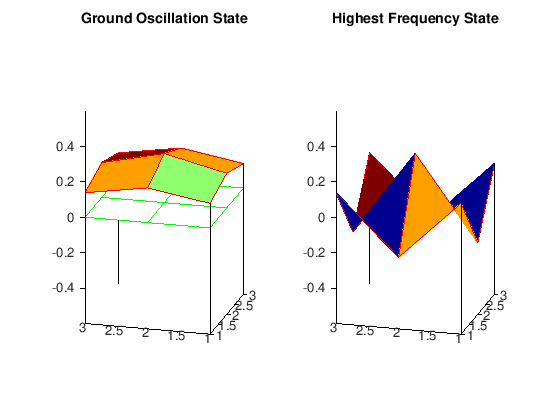

In [14]:
[s,t] = meshgrid(1:3);
figure;
subplot(1,2,1)
surf(GS_matrix,'EdgeColor','red')
colormap('jet')
title('Ground Oscillation State')
grid off;
axis([1 3 1 3 -0.6 0.6])
hold on
plane=0*s;
mesh(s,t,plane,'EdgeColor', 'green')
hold off
view(285,11)
subplot(1,2,2)
surf(HS_matrix,'EdgeColor','red')
title('Highest Frequency State')
axis([1 3 1 3 -0.6 0.6])
view(285,11)
grid off;

The important thing to notice here is that in the **ground oscillation** the displacements of each of the lattice points have the same sign, thus recovering the result from the *theory of continuous oscillators* that the ground oscillation never vanishes in the interior of the membrane. On the other hand, as fas as the **oscillation with the highest frequency** is concerned, the displacements have a maximal number of sign changes. To clarify this, we have included in the plot the plane $z=0$, so that we can verify that between two positive displacements there is a negative one (this can be seen from the lattice function ``HS_matrix`` as well), leading to a maximum number of node lines in the membrane region. We refer the reader to the classical [texbook](https://onlinelibrary.wiley.com/doi/book/10.1002/9783527617210) of Courant and Hilbert for a complete treatment of vibrations and eigenvalue problems.

## Summary
_________

In this tutorial, we have illustrated how group theoretical methods can be implemented in an eigenvalue problem when the operator in question is subject to symmetries and we indicated a way that *RepLAB* can act as a complement to numerically solve a toy model, namely the eigenvalue problem of an oscillating square membrane. In particular, we emphasized that we can arrive at the **block diagonalization** of the matrix $M$ with ease, provided that we make use of a unique feature of *RepLAB*: the change of basis matrix that it provides, every time we ask *RepLAB* to decompose a representation into its irreducible components.

Before we close, even though we discretized the square region using only $n=9$ lattice points, thus asking for the dihedral group $D_4$ as a subgroup in the group $S_9$, a generalization of the method presented in this document is straighforward in arbitrary number of points. For instance, we could have employed a lattice with even more points and asking for $D_4$ as a subgroup in the symmetric group $S_n$. However, for the purposes of the current tutorial, we decided to use only 9 lattice points and focus on making clear how a block-diagonal structure for the matrix $M$ can be accomplished numerically in *RepLAB*.